In [2]:
import os, datetime
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [7]:
# data = pd.read_csv('https://www.kaggle.com/kumarajarshi/life-expectancy-who')
data = pd.read_csv('./datasets/Life Expectancy Data.csv')

In [15]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [12]:
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [20]:
#--- set missing valus to mean of that column

countries = data.Country.unique()

na_cols = ['Life expectancy ','Adult Mortality','Alcohol','Hepatitis B',' BMI ','Polio','Total expenditure',
          'Diphtheria ','GDP','Population',' thinness  1-19 years',' thinness 5-9 years','Income composition of resources',
          'Schooling']

for col in na_cols:
    for country in countries:
        data.loc[data['Country']== country, col] = data.loc[data['Country']== country, col].\
        fillna(data[data['Country']==country][col].mean())

In [22]:
data = data.dropna()

In [23]:
data.Status.value_counts()

Developing    1824
Developed      304
Name: Status, dtype: int64

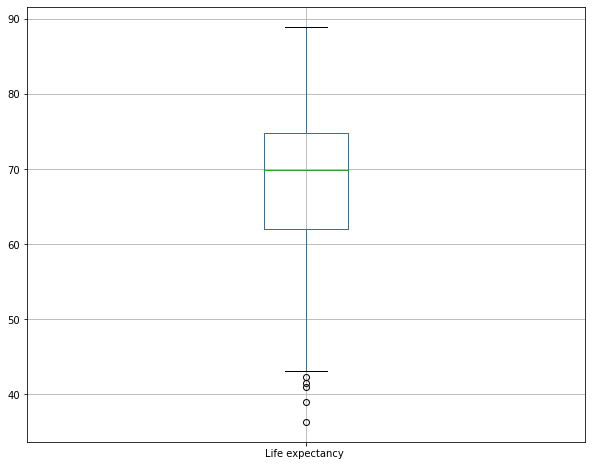

In [24]:
plt.figure(figsize = (10,8))

data.boxplot('Life expectancy ')
plt.show()

/usr/local/Caskroom/miniconda/base/envs/env01/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


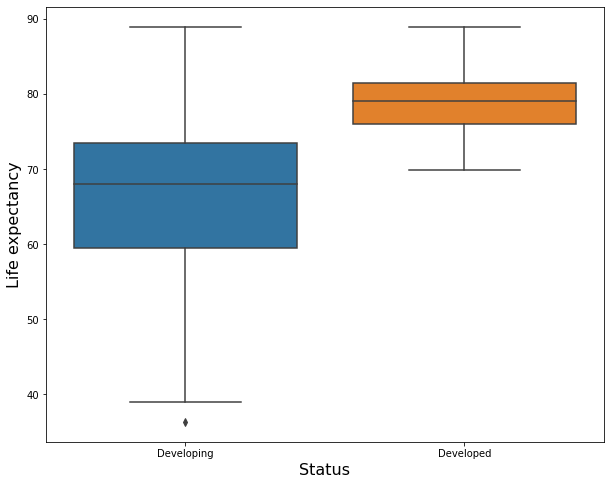

In [27]:
plt.figure(figsize = (10,8))
sns.boxplot('Status', 'Life expectancy ', data = data)
plt.xlabel('Status', fontsize = 16)
plt.ylabel('Life expectancy', fontsize = 16)
plt.show()

/usr/local/Caskroom/miniconda/base/envs/env01/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


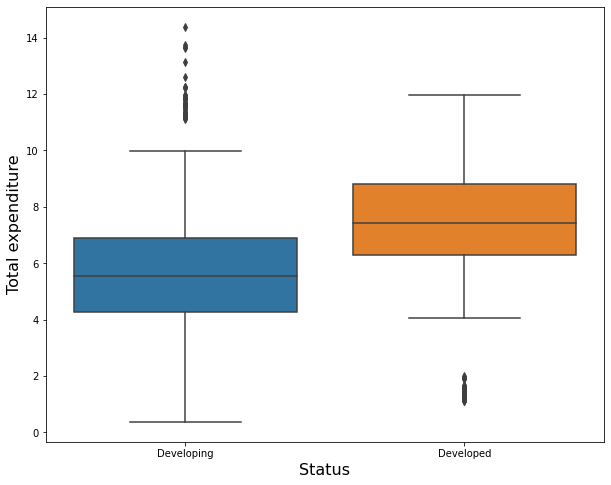

In [26]:
plt.figure(figsize = (10,8))
sns.boxplot('Status', 'Total expenditure', data = data)
plt.xlabel('Status', fontsize = 16)
plt.ylabel('Total expenditure', fontsize = 16)
plt.show()

In [29]:
data_corr = data[['Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']].corr()
data_corr

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Life expectancy,1.000000,-0.662604,-0.162808,0.395776,0.395555,0.246137,-0.135319,0.594391,-0.189417,0.425408,0.203689,0.449975,-0.572137,0.445425,-0.011420,-0.458721,-0.450215,0.734244,0.746619
Adult Mortality,-0.662604,1.000000,0.042165,-0.183263,-0.233876,-0.100522,-0.005653,-0.370251,0.056828,-0.212945,-0.097938,-0.212157,0.532695,-0.259500,-0.021050,0.277278,0.282890,-0.418546,-0.408661
infant deaths,-0.162808,0.042165,1.000000,-0.103068,-0.085955,-0.215084,0.520328,-0.225732,0.996602,-0.152672,-0.148691,-0.156520,0.003869,-0.097887,0.555949,0.483646,0.489440,-0.139262,-0.194936
Alcohol,0.395776,-0.183263,-0.103068,1.000000,0.417454,0.098251,-0.030689,0.375714,-0.098159,0.238104,0.237493,0.236125,-0.032663,0.459611,-0.023624,-0.401590,-0.390655,0.534276,0.591569
percentage expenditure,0.395555,-0.233876,-0.085955,0.417454,1.000000,0.005114,-0.065444,0.260670,-0.088478,0.155728,0.214011,0.161683,-0.102166,0.934210,-0.015322,-0.258344,-0.258194,0.390096,0.405435
Hepatitis B,0.246137,-0.100522,-0.215084,0.098251,0.005114,1.000000,-0.130280,0.167290,-0.224863,0.468473,0.134913,0.581674,-0.107560,0.029970,-0.111176,-0.133135,-0.137602,0.201813,0.247798
Measles,-0.135319,-0.005653,0.520328,-0.030689,-0.065444,-0.130280,1.000000,-0.165920,0.527674,-0.110816,-0.111248,-0.115512,0.020215,-0.073369,0.266169,0.234345,0.229632,-0.135472,-0.142565
BMI,0.594391,-0.370251,-0.225732,0.375714,0.260670,0.167290,-0.165920,1.000000,-0.235991,0.260161,0.235340,0.262309,-0.236691,0.304142,-0.067975,-0.555157,-0.562781,0.542882,0.585756
under-five deaths,-0.189417,0.056828,0.996602,-0.098159,-0.088478,-0.224863,0.527674,-0.235991,1.000000,-0.170560,-0.148941,-0.177450,0.015733,-0.101544,0.543567,0.485134,0.489724,-0.159229,-0.211838
Polio,0.425408,-0.212945,-0.152672,0.238104,0.155728,0.468473,-0.110816,0.260161,-0.170560,1.000000,0.168967,0.663645,-0.137094,0.188942,-0.034258,-0.204462,-0.205446,0.378877,0.410273


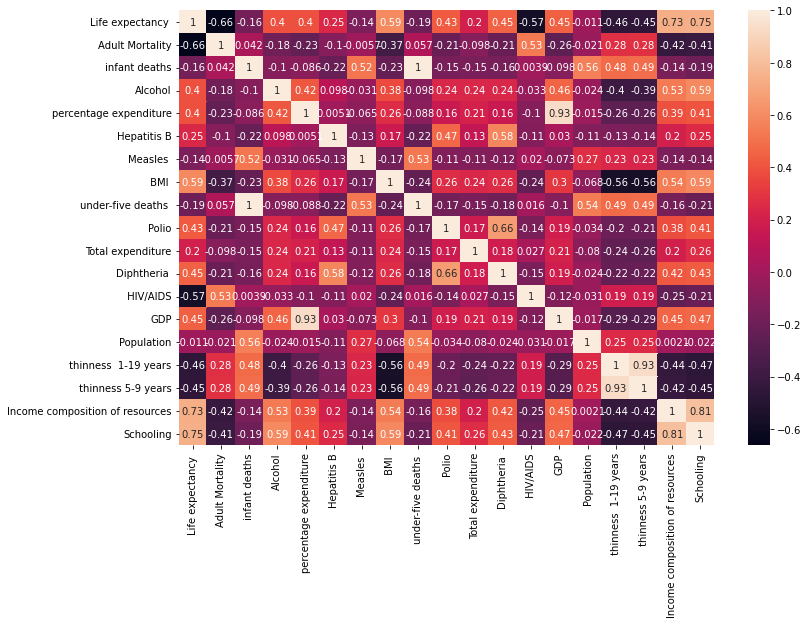

In [30]:
fig, ax = plt.subplots(figsize = (12,8))
sns.heatmap(data_corr, annot = True)
plt.show()

In [31]:
features = data.drop('Life expectancy ',axis = 1)
target = data[['Life expectancy ']]

In [33]:
features = features.drop('Country',axis = 1)

In [34]:
categorical_features = features['Status'].copy()

In [35]:
categorical_features = pd.get_dummies(categorical_features)

In [37]:
numeric_features = features.drop('Status',axis = 1).copy()

In [38]:
numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2128.0,2.007500e+03,4.610856e+00,2000.00000,2003.750000,2.007500e+03,2.011250e+03,2.015000e+03
Adult Mortality,2128.0,1.743003e+02,1.297593e+02,1.00000,76.000000,1.520000e+02,2.412500e+02,7.230000e+02
infant deaths,2128.0,3.590273e+01,1.362247e+02,0.00000,1.000000,4.000000e+00,2.400000e+01,1.800000e+03
Alcohol,2128.0,4.436893e+00,3.962858e+00,0.01000,0.827500,3.735000e+00,7.162500e+00,1.787000e+01
percentage expenditure,2128.0,6.400720e+02,1.710799e+03,0.00000,19.883256,8.367799e+01,4.313651e+02,1.896135e+04
Hepatitis B,2128.0,7.727206e+01,2.526004e+01,2.00000,68.000000,8.700000e+01,9.500000e+01,9.900000e+01
Measles,2128.0,2.657467e+03,1.191224e+04,0.00000,0.000000,2.000000e+01,4.592500e+02,2.121830e+05
BMI,2128.0,3.669196e+01,1.984373e+01,1.40000,18.400000,3.885000e+01,5.520000e+01,7.760000e+01
under-five deaths,2128.0,4.981720e+01,1.851527e+02,0.00000,1.000000,4.000000e+00,3.425000e+01,2.500000e+03
Polio,2128.0,8.057201e+01,2.417005e+01,3.00000,75.000000,9.100000e+01,9.600000e+01,9.900000e+01


In [40]:
standardScaler = StandardScaler()

numeric_features = pd.DataFrame(standardScaler.fit_transform(numeric_features),
                               columns = numeric_features.columns,
                               index = numeric_features.index)
numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2128.0,0.000000e+00,1.000235,-1.626978,-0.813489,0.000000,0.813489,1.626978
Adult Mortality,2128.0,-5.342427e-17,1.000235,-1.335866,-0.757737,-0.171899,0.516075,4.229591
infant deaths,2128.0,0.000000e+00,1.000235,-0.263617,-0.256275,-0.234247,-0.087396,12.952948
Alcohol,2128.0,1.402387e-16,1.000235,-1.117358,-0.911020,-0.177159,0.687950,3.390549
percentage expenditure,2128.0,1.335607e-17,1.000235,-0.374224,-0.362599,-0.325301,-0.122022,10.711711
Hepatitis B,2128.0,3.005115e-17,1.000235,-2.980588,-0.367151,0.385202,0.701983,0.860373
Measles,2128.0,0.000000e+00,1.000235,-0.223140,-0.223140,-0.221460,-0.184578,17.593236
BMI,2128.0,4.674623e-17,1.000235,-1.778912,-0.922017,0.108777,0.932909,2.061994
under-five deaths,2128.0,-1.669508e-17,1.000235,-0.269123,-0.263721,-0.247514,-0.084097,13.236418
Polio,2128.0,8.347542e-17,1.000235,-3.210181,-0.230588,0.431544,0.638460,0.762610


In [41]:
processed_features = pd.concat([numeric_features, categorical_features], axis = 1, sort = False)
processed_features.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,1.626978,0.683732,0.191620,-1.117358,-0.332550,-0.485943,-0.126242,-0.886733,0.179261,-3.086031,...,-0.649601,-0.355934,-0.424250,0.322064,2.566866,2.523280,-0.631802,-0.497055,0,1
1,1.410048,0.745399,0.206305,-1.117358,-0.331238,-0.604736,-0.181828,-0.911936,0.195467,-0.934103,...,-0.773729,-0.355934,-0.421749,-0.207042,2.630549,2.564910,-0.646555,-0.528280,0,1
2,1.193118,0.722274,0.220990,-1.117358,-0.331416,-0.525541,-0.187034,-0.937139,0.211674,-0.768570,...,-0.690977,-0.355934,-0.420074,0.290313,2.673004,2.606539,-0.676060,-0.559506,0,1
3,0.976187,0.753107,0.243018,-1.117358,-0.328513,-0.406748,0.010876,-0.962342,0.233283,-0.561654,...,-0.566848,-0.355934,-0.416713,-0.153680,2.715459,2.668984,-0.710482,-0.590731,0,1
4,0.759257,0.776233,0.257703,-1.117358,-0.370075,-0.367151,0.029853,-0.982504,0.254892,-0.520270,...,-0.525472,-0.355934,-0.470041,-0.165057,2.779142,2.710614,-0.754739,-0.684408,0,1


In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(processed_features,
                                                   target,
                                                   test_size = 0.2,
                                                   random_state = 1)

In [43]:
def build_single_layer_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(32, #--- number of nodes
                                   input_shape = (x_train.shape[1],), #---number of features
                                   activation = 'sigmoid'))
    model.add(tf.keras.layers.Dense(1)) #---output layer
    
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01) #--- popular optimizers , low memory use
    
    model.compile(loss = 'mse',
                 metrics = ['mae','mse'],
                 optimizer = optimizer)
    return model

In [44]:
model = build_single_layer_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                704       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________


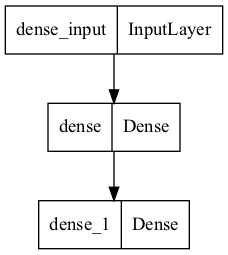

In [45]:
tf.keras.utils.plot_model(model)

In [46]:
num_epochs = 100

training_history = model.fit(x_train,
                            y_train,
                            epochs = num_epochs,
                            validation_split = 0.2,
                            verbose = True)

Epoch 1/100
43/43 [==============================] - 1s 4ms/step - loss: 4206.6294 - mae: 64.1668 - mse: 4206.6294 - val_loss: 3601.2588 - val_mae: 59.4078 - val_mse: 3601.2588
Epoch 2/100
43/43 [==============================] - 0s 1ms/step - loss: 2927.6841 - mae: 53.3667 - mse: 2927.6841 - val_loss: 2204.5908 - val_mae: 46.2822 - val_mse: 2204.5908
Epoch 3/100
43/43 [==============================] - 0s 1ms/step - loss: 1599.6846 - mae: 38.9004 - mse: 1599.6846 - val_loss: 1062.0426 - val_mae: 31.4733 - val_mse: 1062.0426
Epoch 4/100
43/43 [==============================] - 0s 1ms/step - loss: 722.4811 - mae: 25.3388 - mse: 722.4811 - val_loss: 459.7339 - val_mae: 19.8035 - val_mse: 459.7339
Epoch 5/100
43/43 [==============================] - 0s 1ms/step - loss: 307.6295 - mae: 15.6657 - mse: 307.6295 - val_loss: 198.0902 - val_mae: 12.2672 - val_mse: 198.0902
Epoch 6/100
43/43 [==============================] - 0s 1ms/step - loss: 137.6167 - mae: 9.9774 - mse: 137.6167 - val_loss:

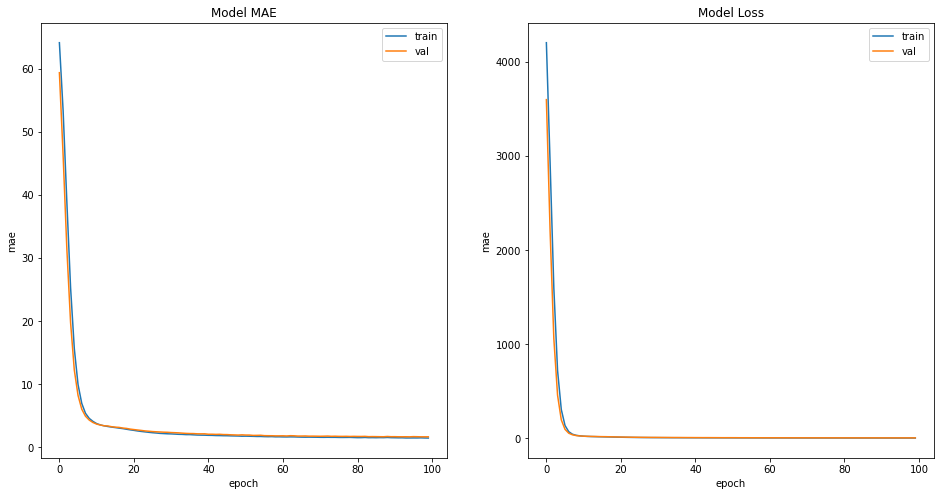

In [47]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)


plt.plot(training_history.history['mae'])
plt.plot(training_history.history['val_mae'])

plt.xlabel('epoch')
plt.ylabel('mae')
plt.title("Model MAE")
plt.legend(['train','val'])

plt.subplot(1,2,2)
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('mae')
plt.title("Model Loss")
plt.legend(['train','val'])


plt.show()

In [48]:
model.evaluate(x_test, y_test)

14/14 [==============================] - 0s 1ms/step - loss: 6.0067 - mae: 1.7607 - mse: 6.0067


[6.0066633224487305, 1.7607102394104004, 6.0066633224487305]

In [49]:
y_pred = model.predict(x_test)

r2_score(y_test, y_pred)

0.9334573059798298

In [50]:
pred_results = pd.DataFrame({'y_test':y_test.values.flatten(),
                            'y_pred': y_pred.flatten()}, index = range(len(y_pred)))

In [51]:
pred_results

,y_test,y_pred
0,75.1,76.671196
1,76.3,73.448372
2,73.9,73.211464
3,75.4,76.005936
4,68.3,69.070976
...,...,...
421,73.0,63.665226
422,69.3,71.288864
423,63.0,61.707027
424,79.6,78.127747


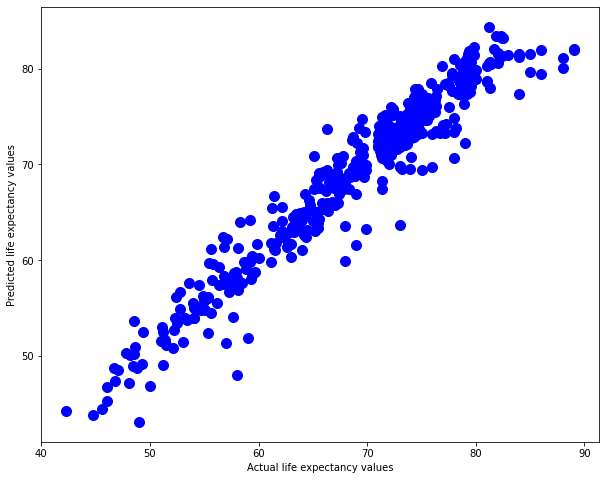

In [52]:
plt.figure(figsize = (10,8))
plt.scatter(y_test,y_pred, s=100, c='blue')

plt.xlabel('Actual life expectancy values')
plt.ylabel('Predicted life expectancy values')
plt.show()

In [54]:
def build_multiple_layer_model():
    model = tf.keras.Sequential([layers.Dense(32, #--- number of nodes
                                   input_shape = (x_train.shape[1],), #---number of features
                                   activation = 'relu'),
                                 layers.Dense(16, activation = 'relu'),
                                 layers.Dense(4, activation = 'relu'),
                                 layers.Dense(1)]) #---output layer
    
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001) #--- popular optimizers , low memory use
    
    model.compile(loss = 'mse',
                 metrics = ['mae','mse'],
                 optimizer = optimizer)
    return model

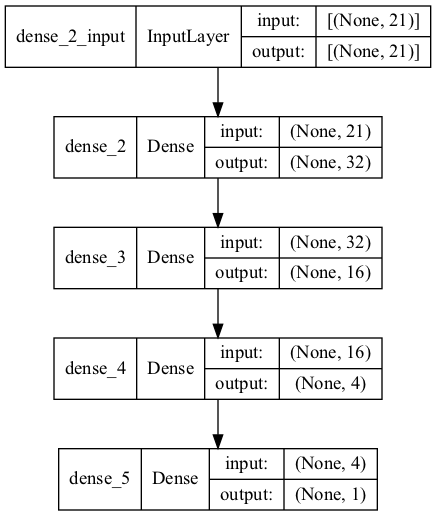

In [55]:
model = build_multiple_layer_model()
tf.keras.utils.plot_model(model, show_shapes = True)

(None, 21) means unknown number of observations (batch size), 21 features.

### Setting up a tensorboard

In [56]:
!rm - rf seq_logs
!ls -l

rm: -: No such file or directory
rm: rf: No such file or directory
rm: seq_logs: No such file or directory
total 1328
-rw-r--r--  1 rachel.lund  staff   30417 23 Dec 17:50 00. tensorflow_basics.ipynb
-rw-r--r--  1 rachel.lund  staff    6571 23 Dec 18:10 01. tf_v1_static_execution.ipynb
-rw-r--r--  1 rachel.lund  staff    3277 23 Dec 18:23 02. eager_execution.ipynb
-rw-r--r--  1 rachel.lund  staff   77575 26 Dec 09:35 03. simple_linear_model.ipynb
-rw-r--r--  1 rachel.lund  staff   40287 26 Dec 09:58 04. keras_linear_regression.ipynb
-rw-r--r--  1 rachel.lund  staff      18 23 Dec 10:09 README.md
-rw-r--r--  1 rachel.lund  staff  468902 26 Dec 16:40 Untitled.ipynb
-rw-r--r--  1 rachel.lund  staff      72 23 Dec 17:45 Untitled1.ipynb
drwxr-xr-x  3 rachel.lund  staff      96 26 Dec 10:37 datasets
drwxr-xr-x  4 rachel.lund  staff     128 23 Dec 18:04 logs
-rw-r--r--  1 rachel.lund  staff   33599 26 Dec 16:39 model.png


In [58]:
#--- create a path for logging

logdir = os.path.join("seq_logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

#---captures intermediate data
tensorboard_callback = keras.callbacks.TensorBoard(logdir, histogram_freq = 1)

In [61]:


training_history = model.fit(x_train,
                            y_train,
                            epochs = 500,
                            validation_split = 0.2,
                             batch_size = 100,
                            verbose = True,
                            callbacks = [tensorboard_callback])

Epoch 1/500
14/14 [==============================] - 1s 32ms/step - loss: 4690.3296 - mae: 67.7986 - mse: 4690.3296 - val_loss: 4626.1748 - val_mae: 67.3322 - val_mse: 4626.1743
Epoch 2/500
14/14 [==============================] - 0s 4ms/step - loss: 4568.6362 - mae: 66.9009 - mse: 4568.6362 - val_loss: 4500.9185 - val_mae: 66.3978 - val_mse: 4500.9185
Epoch 3/500
14/14 [==============================] - 0s 4ms/step - loss: 4433.4404 - mae: 65.8878 - mse: 4433.4404 - val_loss: 4347.0757 - val_mae: 65.2388 - val_mse: 4347.0757
Epoch 4/500
14/14 [==============================] - 0s 4ms/step - loss: 4258.1250 - mae: 64.5627 - mse: 4258.1255 - val_loss: 4142.1812 - val_mae: 63.6727 - val_mse: 4142.1812
Epoch 5/500
14/14 [==============================] - 0s 4ms/step - loss: 4018.3145 - mae: 62.7137 - mse: 4018.3145 - val_loss: 3863.8318 - val_mae: 61.4888 - val_mse: 3863.8318
Epoch 6/500
14/14 [==============================] - 0s 4ms/step - loss: 3701.4941 - mae: 60.1809 - mse: 3701.4941

In [63]:
%load_ext tensorboard

In [64]:
%tensorboard --logdir seq_logs --port 6050

In [78]:
def build_model_with_sgd():
    model = tf.keras.Sequential([layers.Dense(32, #--- number of nodes
                                   input_shape = (x_train.shape[1],), #---number of features
                                   activation = 'relu'),
                                 layers.Dense(16, activation = 'relu'),
                                 layers.Dense(4, activation = 'relu'),
                                 layers.Dense(1)]) #---output layer
    
    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001) #--- popular optimizers , low memory use
    
    model.compile(loss = 'mse',
                 metrics = ['mae','mse'],
                 optimizer = optimizer)
    return model

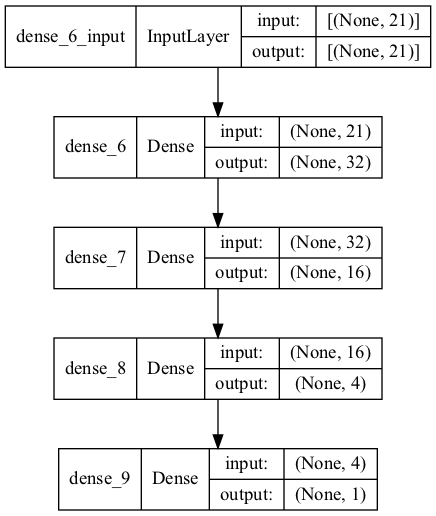

In [79]:
model_sgd = build_model_with_sgd()
tf.keras.utils.plot_model(model, show_shapes = True)

In [80]:
training_history = model_sgd.fit(x_train,
                            y_train,
                            epochs = 100,
                            validation_split = 0.2,
                             batch_size = 100,
                            verbose = True
                           )

Epoch 1/100
14/14 [==============================] - 0s 10ms/step - loss: 4613.3813 - mae: 67.2334 - mse: 4613.3813 - val_loss: 4470.2051 - val_mae: 66.1689 - val_mse: 4470.2051
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 3401.7424 - mae: 55.0565 - mse: 3401.7424 - val_loss: 1100.8925 - val_mae: 31.5980 - val_mse: 1100.8925
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 2549.4309 - mae: 45.0709 - mse: 2549.4309 - val_loss: 1762.2942 - val_mae: 38.8885 - val_mse: 1762.2942
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 1376.3137 - mae: 30.6079 - mse: 1376.3137 - val_loss: 142.7587 - val_mae: 10.0630 - val_mse: 142.7587
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 133.6104 - mae: 9.9813 - mse: 133.6104 - val_loss: 48.2260 - val_mae: 5.7243 - val_mse: 48.2260
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 43.7113 - mae: 5.4505 - mse: 43.7113 - val_loss: 33

In [81]:
model_sgd.evaluate(x_test, y_test)

14/14 [==============================] - 0s 1ms/step - loss: 13.4129 - mae: 2.9124 - mse: 13.4129


[13.412925720214844, 2.9124491214752197, 13.412925720214844]

In [82]:
y_pred = model_sgd.predict(x_test)

r2_score(y_test, y_pred)

0.8514096192707008

In [84]:
def build_model_with_rmsprop():
    model = tf.keras.Sequential([layers.Dense(16, #--- number of nodes
                                   input_shape = (x_train.shape[1],), #---number of features
                                   activation = 'elu'),
                                 layers.Dense(8, activation = 'elu'),
                                 layers.Dense(4, activation = 'elu'),
                                 layers.Dense(1)]) #---output layer
    
    optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001) #--- popular optimizers , low memory use
    
    model.compile(loss = 'mse',
                 metrics = ['mae','mse'],
                 optimizer = optimizer)
    return model

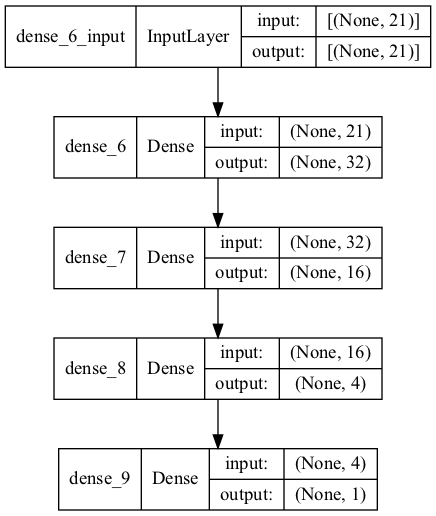

In [87]:
model_rmsprop = build_model_with_rmsprop()
tf.keras.utils.plot_model(model, show_shapes = True)

In [88]:
training_history = model_rmsprop.fit(x_train,
                            y_train,
                            epochs = 100,
                            validation_split = 0.2,
                             batch_size = 100,
                            verbose = True
                           )

Epoch 1/100
14/14 [==============================] - 1s 10ms/step - loss: 4554.8789 - mae: 66.9492 - mse: 4554.8789 - val_loss: 4423.9565 - val_mae: 66.0413 - val_mse: 4423.9565
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 4309.4536 - mae: 65.1940 - mse: 4309.4536 - val_loss: 4191.5210 - val_mae: 64.3417 - val_mse: 4191.5205
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 4065.9614 - mae: 63.3823 - mse: 4065.9614 - val_loss: 3933.9270 - val_mae: 62.3823 - val_mse: 3933.9270
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 3787.2190 - mae: 61.2087 - mse: 3787.2190 - val_loss: 3631.7925 - val_mae: 59.9666 - val_mse: 3631.7925
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 3468.2000 - mae: 58.5757 - mse: 3468.2000 - val_loss: 3297.9868 - val_mae: 57.1044 - val_mse: 3297.9868
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 3122.6311 - mae: 55.4883 - mse: 3122.6311

In [89]:
model_rmsprop.evaluate(x_test, y_test)

14/14 [==============================] - 0s 985us/step - loss: 9.3514 - mae: 2.3181 - mse: 9.3514


[9.351370811462402, 2.3181300163269043, 9.351370811462402]

In [90]:
y_pred = model_rmsprop.predict(x_test)
r2_score(y_test, y_pred)

0.896404144826053